## Imports

In [10]:
import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score
%run /kaggle/input/notebook/utils.ipynb import *
%run /kaggle/input/files-data/models.ipynb import *

## Load Processed Data

In [2]:
train_data = pd.read_csv('/kaggle/input/files-data/train_data.csv')
test_data = pd.read_csv('/kaggle/input/files-data/test_data.csv')

In [3]:
X_train = train_data.drop(columns=['Label'], axis=1)
y_train = train_data[['Label']]
X_test = test_data.drop(columns=['Label'], axis=1)
y_test = test_data[['Label']]

## Core Model

We will use the **Tokenizer** of **AraBERT** to convert our full names into tokens after that ids that represent each word to make data ready for my own Deep Learning Model

In [4]:
# load the tokenizer
model_name = 'aubmindlab/bert-base-arabertv02'
transformer = DataTransformer(model_name=model_name)

This method apply all transofrmation and preprocessing for the names data, as it converts it to **Tokens** and convert tokens into **IDs** and **Encodes** the labels of the data by converting them to **One Hot Encoding** return to us the data ready to be fed into my own Deep Learning Model

In [5]:
# transofrm X_train and y_train data
X_train , y_train = transformer.transform_data(X_train,y_train)
# transform X_test and y_test data
X_test , y_test = transformer.transform_data(X_test,y_test)

Define my own **Model Architecture**

In [6]:
# hyperparameters
VOCAB_SIZE = 10000
MAX_LEN = 50
EMBEDDING_DIM = 16
HIDDEN_SIZE = 32
NUM_CLASSES = 2
BATCH_SIZE = 512
EPOCHS = 35
LSTM_SIZE = 16
VAL_SLPIT = 0.15
OPTIMIZER = Adam()
LOSS = BinaryCrossentropy()
METRICS = ['accuracy']

In [7]:
custom_model = CustomModel(OPTIMIZER= OPTIMIZER, LOSS= LOSS, METRICS= METRICS)
model = custom_model.create_model(VOCAB_SIZE= VOCAB_SIZE, EMBEDDING_DIM= EMBEDDING_DIM, MAX_LEN= MAX_LEN, 
                                LSTM_SIZE= LSTM_SIZE, HIDDEN_SIZE= HIDDEN_SIZE, NUM_CLASSES= NUM_CLASSES)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 32)           4224      
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 6

In [8]:
# Training...
history = model.fit(x= X_train,y= y_train, batch_size= BATCH_SIZE, epochs = EPOCHS, validation_split= VAL_SLPIT)

Epoch 1/35
1466/1466 [==============================] - 26s 13ms/step - loss: 0.5107 - accuracy: 0.7493 - val_loss: 0.4659 - val_accuracy: 0.7792
Epoch 2/35
1466/1466 [==============================] - 17s 12ms/step - loss: 0.4398 - accuracy: 0.7994 - val_loss: 0.3977 - val_accuracy: 0.8212
Epoch 3/35
1466/1466 [==============================] - 17s 12ms/step - loss: 0.3801 - accuracy: 0.8328 - val_loss: 0.3426 - val_accuracy: 0.8519
Epoch 4/35
1466/1466 [==============================] - 17s 12ms/step - loss: 0.3320 - accuracy: 0.8600 - val_loss: 0.3036 - val_accuracy: 0.8728
Epoch 5/35
1466/1466 [==============================] - 17s 12ms/step - loss: 0.2997 - accuracy: 0.8766 - val_loss: 0.2769 - val_accuracy: 0.8861
Epoch 6/35
1466/1466 [==============================] - 17s 12ms/step - loss: 0.2747 - accuracy: 0.8893 - val_loss: 0.2525 - val_accuracy: 0.8993
Epoch 7/35
1466/1466 [==============================] - 17s 12ms/step - loss: 0.2511 - accuracy: 0.9009 - val_loss: 0.2355 -

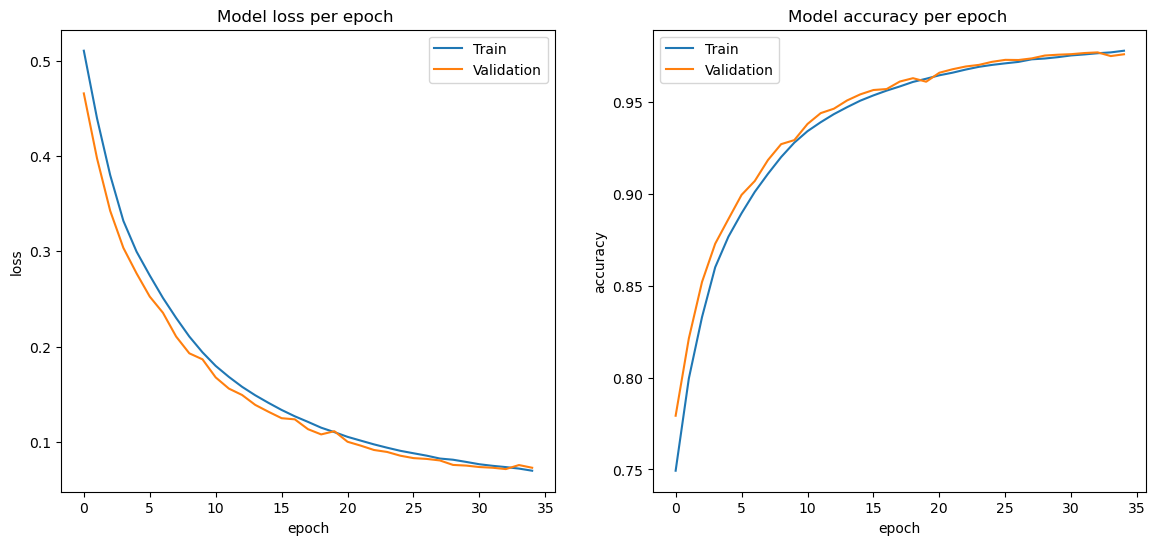

In [11]:
evaluation_tools = ModelEvaluation()
evaluation_tools.plot_curves(history)

In [12]:
y_pred = evaluation_tools.predictions(model, X_test)
# convert predictions to dataframe
y_pred = pd.DataFrame(y_pred, columns=['Correct','Incorrect'])
accuracy = accuracy_score(y_test, y_pred)
print('The accuracy of the model on Test Data is:', accuracy)

4868/4868 [==============================] - 19s 4ms/step
The accuracy of the model on Test Data is: 0.9760960012327606


In [13]:
saved_model_name = '/kaggle/working/name_verification_model.h5'
model.save_weights(saved_model_name,save_format='h5')